# **Real Estate Domain** :- Predicting Real Estate Prices

### Problem Statemente:-
Predict real estate prices based on historical data, location, and other relevant factors

***Guidelines :-***
- Explore the dataset to identify key factors affecting property prices.
- Train regression models like Linear Regression, Ridge, or Gradient Boosting Machines.
- Validate the model on different regions and property types to assess its generalizability.

#### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
data = pd.concat([df1, df2], ignore_index=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.2797


In [3]:
data #load data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.2209
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.7782
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.4234
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.2797


# **Domain Analysis**
* Comparable home values, the age, size, and condition of a property, neighborhood appeal, and the health of the overall housing market can affect home prices.
* The main factor which affects property prices is the supply and demand of that particular area. Properties located in areas with a great deal of good quality development and convenience to all facilities attract buyers from other places, thus pushing up the price.


# Data Information
This data set contains 80 features and Target variable.
The target variable is SalePrice
The target variable is continuous in nature i.e. it contains float values. So we use the Regression task.

Atrribute information:
SalePrice: The property's sale price in dollars. This is typically the target variable that you want to predict in a regression analysis.

MSSubClass: The building class. This categorizes the type of dwelling based on its construction type (e.g., one-story, two-story, split-level).

MSZoning: The general zoning classification of the property, which indicates how the land is legally designated for use (e.g., residential, commercial, agricultural).

LotFrontage: Linear feet of street connected to the property, indicating the width of the lot along the street side.

LotArea: Lot size in square feet, which represents the total area of the land that the property occupies.

Street: Type of road access to the property (e.g., paved, gravel).

Alley: Type of alley access to the property, if any (e.g., paved, gravel, no alley access).

LotShape: General shape of the property lot (e.g., regular, irregular), which can affect property layout and potential use.

LandContour: Flatness of the property (e.g., level, banked, gentle slope), which can influence construction feasibility and aesthetics.

Utilities: Type of utilities available to the property (e.g., electricity, gas, water, sewer), essential for living conditions and property value.

LotConfig: Lot configuration, describing the position and shape of the property within its surroundings (e.g., inside lot, corner lot).

LandSlope: Slope of the property (e.g., gentle, moderate, severe).

Neighborhood: Physical locations within Ames city limits, which can significantly impact property value and desirability.

Condition1: Proximity to main road or railroad.

Condition2: Proximity to main road or railroad (if a second is present).

BldgType: Type of dwelling (e.g., single-family, townhouse, duplex).

HouseStyle: Style of dwelling (e.g., one-story, two-story).

OverallQual: Overall material and finish quality of the house.

OverallCond: Overall condition rating of the house.

YearBuilt: Original construction date of the house.

YearRemodAdd: Remodel date (if any).

RoofStyle: Type of roof.

RoofMatl: Roof material.

Exterior1st: Exterior covering on the house.

Exterior2nd: Exterior covering on the house (if more than one material).

MasVnrType: Masonry veneer type.

MasVnrArea: Masonry veneer area in square feet.

ExterQual: Exterior material quality.

ExterCond: Present condition of the material on the exterior.

Foundation: Type of foundation.

BsmtQual: Height of the basement.

BsmtCond: General condition of the basement.

BsmtExposure: Walkout or garden level basement walls.

BsmtFinType1: Quality of basement finished area (if present).

BsmtFinSF1: Type 1 finished square feet.

BsmtFinType2: Quality of second finished area (if present).

BsmtFinSF2: Type 2 finished square feet.

BsmtUnfSF: Unfinished square feet of basement area.

TotalBsmtSF: Total square feet of basement area.

Heating: Type of heating.

HeatingQC: Heating quality and condition.

CentralAir: Central air conditioning (Y/N).

Electrical: Electrical system.

1stFlrSF: First floor square feet.

2ndFlrSF: Second floor square feet.

LowQualFinSF: Low quality finished square feet (all floors).

GrLivArea: Above grade (ground) living area square feet.

BsmtFullBath: Basement full bathrooms.

BsmtHalfBath: Basement half bathrooms.

FullBath: Full bathrooms above grade.

HalfBath: Half baths above grade.

Bedroom: Number of bedrooms above basement level.

Kitchen: Number of kitchens.

KitchenQual: Kitchen quality.

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).

Functional: Home functionality rating.

Fireplaces: Number of fireplaces.

FireplaceQu: Fireplace quality.

GarageType: Garage location.

GarageYrBlt: Year garage was built.

GarageFinish: Interior finish of the garage.

GarageCars: Size of garage in car capacity.

GarageArea: Size of garage in square feet.

GarageQual: Garage quality.

GarageCond: Garage condition.

PavedDrive: Paved driveway (Y/N).

WoodDeckSF: Wood deck area in square feet.

OpenPorchSF: Open porch area in square feet.

EnclosedPorch: Enclosed porch area in square feet.

3SsnPorch: Three season porch area in square feet.

ScreenPorch: Screen porch area in square feet.

PoolArea: Pool area in square feet.

PoolQC: Pool quality.

Fence: Fence quality.

MiscFeature: Miscellaneous feature not covered in other categories.

MiscVal: $Value of miscellaneous feature.

MoSold: Month Sold.

YrSold: Year Sold.

SaleType: Type of sale.

SaleCondition: Condition of sale.

These variables collectively provide a detailed description of various aspects of residential properties, which are crucial for understanding their market value, characteristics, and appeal to potential buyers. In predictive modeling, selecting and appropriately transforming these features can significantly impact the accuracy and usefulness of the models built to predict the sale price or other aspects of real estate transactions.

## Basic checks:

In [453]:
data.head(5) #first 5 rows 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [454]:
data.tail(5) #last 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [455]:
data.sample(5) # random 5 rows 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
903,904,20,RL,50.0,14859,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,27.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1670,1670,GasA,Ex,Y,SBrkr,1670,0,0,1670,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,690,TA,TA,Y,144,60,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial,240000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,612,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
580,581,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1960,1987,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,85.0,TA,TA,CBlock,TA,TA,No,BLQ,594,Rec,219,331,1144,GasA,Ex,Y,SBrkr,1429,0,0,1429,0,1,1,0,3,1,Gd,7,Typ,2,Gd,Attchd,1960.0,Unf,2,572,TA,TA,Y,216,110,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,181900
1383,1384,30,RL,NaN,25339,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1918,2007,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,816,816,GasA,Ex,Y,SBrkr,1416,0,0,1416,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2,576,TA,TA,N,0,0,112,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,112000
1319,1320,20,RL,75.0,10215,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,132.0,TA,TA,PConc,TA,TA,No,ALQ,492,Unf,0,372,864,GasA,Ex,Y,SBrkr,948,0,0,948,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1954.0,Unf,1,248,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,111000


In [456]:
data.head(pd.set_option('display.max_columns',None)) # all columns in data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [458]:
# data contains total 81 columns, missing/null values are present in dataset , data contains all datatype of int, object and float. 

In [459]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [460]:
#describe() gives statical analysis of numerical columns.
# count shows the number of values.
# Mean in every feature is giving average values of column.
# Std deviation shows a measure of how dispersed the data is in relation to the mean.
# Min and Max shows minimum and maximum values in column.

In [461]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


- gives statistical analysis of object column.
- there is no unique values in data.
- freq shows the values that occured maximun no. of times.

In [463]:
#here in info() we can see that some features have missing values. if missing values are more than 80%,will drop that columns and remaining all we will
#handle them with statistical values
data.drop('Alley',axis=1,inplace=True)
data.drop('PoolQC',axis=1,inplace=True)
data.drop('Fence',axis=1,inplace=True)
data.drop('MiscFeature',axis=1,inplace=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [464]:
data.isnull().sum() # total of null values 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [4]:
data.columns  ## all columns of dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [466]:
## List of columns of float datatype

In [467]:
flt_data=data.select_dtypes(float)
print('Float columns', flt_data.columns)

Float columns Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


### Handling the null values of float datatypes

### LotFrontage

In [470]:
data.LotFrontage.isnull().sum()

259

In [471]:
data['LotFrontage'].median()

69.0

In [472]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']= 69.0

In [473]:
data.LotFrontage.isnull().sum()

0

### MasVnrArea

In [474]:
data.MasVnrArea.isnull().sum()

8

In [475]:
data['MasVnrArea'].median()

0.0

In [476]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']= 0.0

In [477]:
data.MasVnrArea.isnull().sum()

0

### GarageYrBlt

In [478]:
data.GarageYrBlt.isnull().sum()

81

In [479]:
data['GarageYrBlt'].median()

1980.0

In [480]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']= 1980.0

In [481]:
data.GarageYrBlt.isnull().sum()

0

In [482]:
## List of numerical columns
num_data=data.select_dtypes(int)
print('Numerical columns',num_data.columns)

Numerical columns Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [484]:
## List of catogorical columns
cat_data=data.select_dtypes(include=['O'])
print('Categorical columns',cat_data.columns)

Categorical columns Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [485]:
#checking unique values and value counts in catagorical columns 

for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('******************************')

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
******************************
Street ['Pave' 'Grvl']
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
******************************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
******************************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
******************************
Utilities ['AllPub' 'NoSeWa']
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
******************************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
******************************
LandSlope ['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1382
Mod      65
Sev      1

### Handling the null values

#### MasVnrType

In [487]:
data.MasVnrType.isnull().sum()

872

In [488]:
data['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [489]:
data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']= 'BrkFace'

In [490]:
data.MasVnrType.isnull().sum()

0

### BsmtQual

In [491]:
data.BsmtQual.isnull().sum()

37

In [492]:
data['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [493]:
data.loc[data['BsmtQual'].isnull()==True,'BsmtQual']= 'TA'

In [494]:
data.BsmtQual.isnull().sum()

0

### BsmtCond

In [495]:
data.BsmtCond .isnull().sum()

37

In [496]:
data['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [497]:
data.loc[data['BsmtCond'].isnull()==True,'BsmtCond']= 'TA'

In [498]:
data.BsmtCond .isnull().sum()

0

### BsmtExposure

In [499]:
data.BsmtExposure.isnull().sum()

38

In [500]:
data['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [501]:
data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure']='No'

In [502]:
data.BsmtExposure.isnull().sum()

0

### BsmtFinType1

In [503]:
data.BsmtFinType1.isnull().sum()

37

In [285]:
data['BsmtFinType1'].mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [286]:
data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1']='Unf'

In [287]:
data.BsmtFinType1.isnull().sum()

0

### BsmtFinType2

In [288]:
data.BsmtFinType2.isnull().sum()

38

In [289]:
data['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [290]:
data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2']='Unf'

In [291]:
data.BsmtFinType2.isnull().sum()

0

### Electrical

In [292]:
data.Electrical.isnull().sum()

1

In [293]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [294]:
data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [295]:
data.Electrical.isnull().sum()

0

### FireplaceQu

In [296]:
data.FireplaceQu.isnull().sum()

690

In [297]:
data['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [298]:
data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='Gd'

In [299]:
data.FireplaceQu.isnull().sum()

0

### GarageType

In [300]:
data.GarageType.isnull().sum()

81

In [301]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [302]:
data.loc[data['GarageType'].isnull()==True,'GarageType']='Attchd'

In [303]:
data.GarageType.isnull().sum()

0

### GarageFinish

In [304]:
data.GarageFinish.isnull().sum()

81

In [305]:
data['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [306]:
data.loc[data['GarageFinish'].isnull()==True,'GarageFinish']='Unf'

In [307]:
data.GarageFinish.isnull().sum()

0

### GarageQual

In [308]:
data.GarageQual.isnull().sum()

81

In [309]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [310]:
data.loc[data['GarageQual'].isnull()==True,'GarageQual']='TA'

In [311]:
data.GarageQual.isnull().sum()

0

### GarageCond

In [312]:
data.GarageCond.isnull().sum()

81

In [313]:
data['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [314]:
data.loc[data['GarageCond'].isnull()==True,'GarageCond']='TA'

In [315]:
data.GarageCond.isnull().sum()

0

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Exploratory Data Analysis

### Univariate analysis using sweetviz

In [5]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Alomst the building class is 40% present.
- The general zoining classification Rl-80%,RM-15%,FV-4%,RH-1% and c less than 1% is present in data.
- 60% plots,building and length of a plot of land or building that directly faces a road.
- Lot size in squarefeet 95 % is maximum.
- Street in pave area soldout nearly 99% compare to grvl less than 1%.
- In lotshape property is regular size 60%, slightly I90% nearrregular 33%, Moderately Irregular 3%,Irregular less 1% in shape present in data.
- In landcountr flatness of the property is 90% near falt level and in depression low level 2%.
- The type of utilities 99% are available.
- Inside property 70%,corner property is 20%, 2 side property is 3% are present in data and In landslope gentle slope is 95% sever slope is less than 1% present in data.
- NAames city limits is compare to other is maximum.
- BldgType compare to all type single family is maximum alomost 80%.
- The house style of 1story house is maximum compare to other house style.
- The overall material and finish of the house is average.
- The overall condition of the house is average.
- Most of the Original construction date in year of 2000.
- Remodel date (same as construction date if no remodeling or additions) in year of 2010.
- The roofstyle gable is most made and the roofmaterial is Standard (Composite) Shingle.
- Exterior covering on house is most Vinyl Siding.
- Masonry veneer type in Brick Face is maximum and 


### Bivariate analysis

#### Checking relationship of all variables with respect to target variable

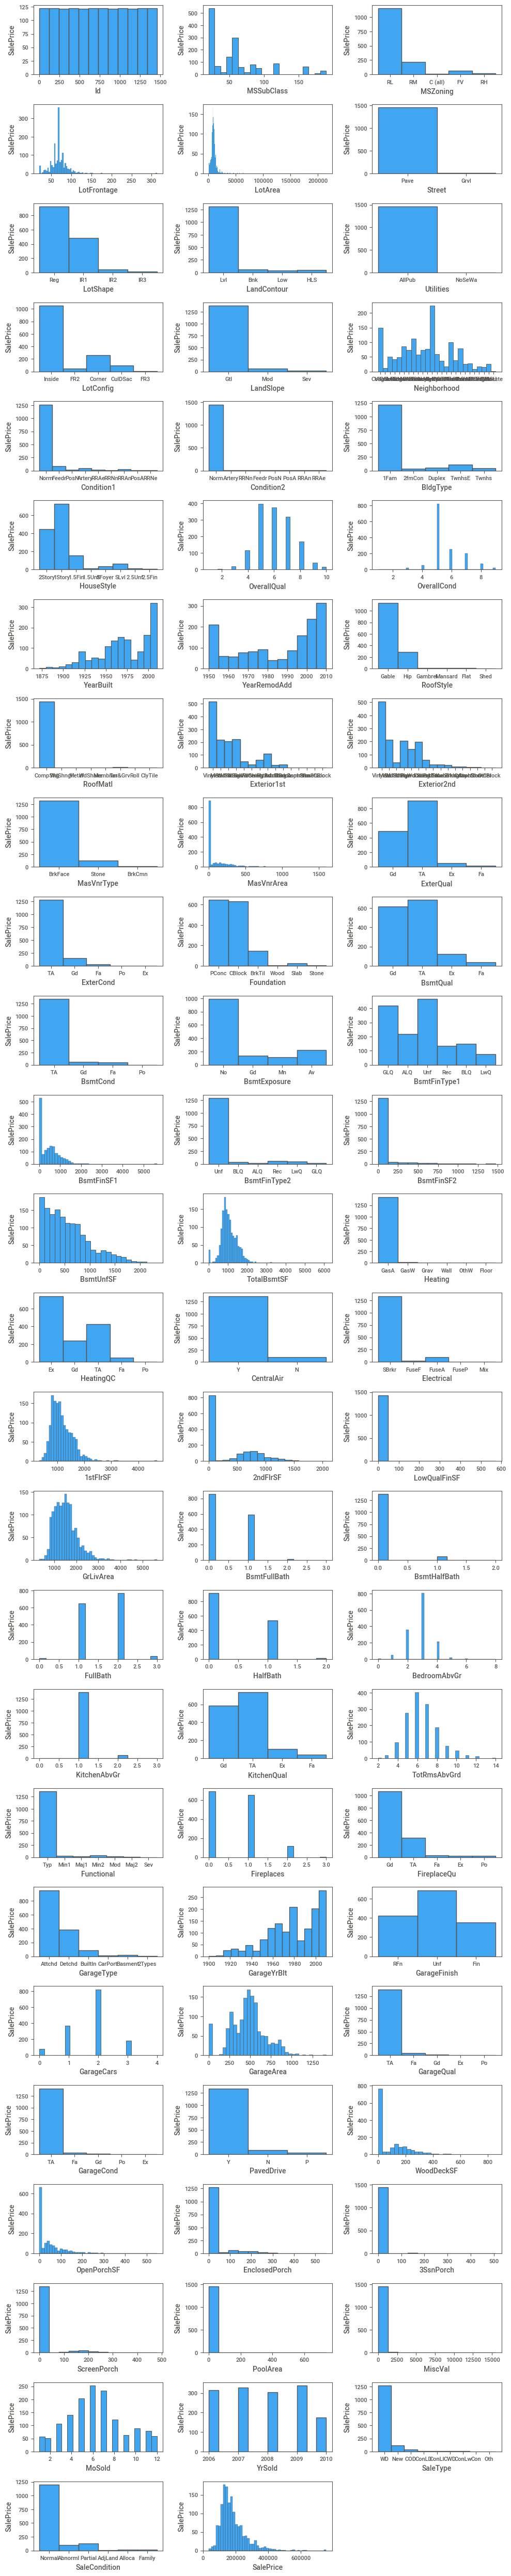

In [78]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(10,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data:#for loop to acess columns form data1
    if plotnumber<=78 :#checking whether count variable is less than 44 or not
        ax = plt.subplot(26,3,plotnumber)#plotting 8 graphs in canvas(11 rows and 4 columns)
        sns.histplot(x=data[column])
        
        plt.xlabel(column,fontsize=10)#assigning name to x-axis and increasing it's font
        plt.ylabel('SalePrice',fontsize=10)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

In [80]:
data.duplicated().sum()

0

## Data Preprocessing

In [334]:
data.describe(include='O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


### Encoding using map()

In [335]:
data.MSZoning.value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [336]:
data.MSZoning=data.MSZoning.map({'RL':4,'RM':3,'FV':2, 'RH':1, 'C (all)':0})

In [337]:
data.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [338]:
data.Street=data.Street.map({'Pave':1, 'Grvl':0})

In [339]:
data.LotShape.value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [340]:
data.LotShape=data.LotShape.map({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})

In [341]:
data.LandContour.value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [342]:
data.LandContour=data.LandContour.map({'Lvl':3, 'Bnk':2, 'HLS':1, 'Low':0})

In [343]:
data.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [344]:
data.Utilities=data.Utilities.map({'AllPub':1, 'NoSeWa':0})

In [345]:
data.LotConfig.value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [346]:
data.LotConfig=data.LotConfig.map({'Inside':4, 'Corner':3, 'CulDSac':2, 'FR2':1, 'FR3':0})

In [347]:
data.LandSlope.value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [348]:
data.LandSlope=data.LandSlope.map({'Gtl':2, 'Mod':1, 'Sev':0})

In [349]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [350]:
data.Neighborhood=data.Neighborhood.map({'NAmes':24, 'CollgCr':23, 'OldTown':22, 'Edwards':21, 'Somerst':20, 'Gilbert':19, 'NridgHt':18,
                                         'Sawyer':17, 'NWAmes':16, 'SawyerW':15, 'BrkSide':14, 'Crawfor':13, 'Mitchel':12, 'NoRidge':11,
                                         'Timber':10, 'IDOTRR':9, 'ClearCr':8, 'StoneBr':7, 'SWISU':6, 'MeadowV':5, 'Blmngtn':4, 'BrDale':3,
                                         'Veenker':2, 'NPkVill':1, 'Blueste':0})

In [351]:
data.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [352]:
data.Condition1=data.Condition1.map({'Norm':8, 'Feedr':7, 'Artery':6, 'RRAn':5, 'PosN':4, 'RRAe':3, 'PosA':2, 'RRNn':1, 'RRNe':0})

In [353]:
data.Condition2.value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [354]:
data.Condition2=data.Condition2.map({'Norm':7, 'Feedr':6, 'Artery':5, 'RRNn':4, 'PosN':3, 'PosA':2, 'RRAn':1, 'RRAe':0})

In [355]:
data.BldgType.value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [356]:
data.BldgType=data.BldgType.map({'1Fam':4, 'TwnhsE':3, 'Duplex':2, 'Twnhs':1, '2fmCon':0})

In [357]:
data.HouseStyle.value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [358]:
data.HouseStyle=data.HouseStyle.map({'1Story':7, '2Story':6, '1.5Fin':5, 'SLvl':4, 'SFoyer':3, '1.5Unf':2, '2.5Unf':1, '2.5Fin':0})

In [359]:
data.RoofStyle.value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [360]:
data.RoofStyle=data.RoofStyle.map({'Gable':5, 'Hip':4, 'Flat':3, 'Gambrel':2, 'Mansard':1, 'Shed':0})

In [361]:
data.RoofMatl.value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [362]:
data.RoofMatl=data.RoofMatl.map({'CompShg':7, 'Tar&Grv':6, 'WdShngl':5, 'WdShake':4, 'Metal':3, 'Membran':2, 'Roll':1, 'ClyTile':0})

In [363]:
data.Exterior1st.value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [364]:
data.Exterior1st=data.Exterior1st.map({'VinylSd':14, 'HdBoard':13, 'MetalSd':12, 'Wd Sdng':11, 'Plywood':10, 'CemntBd':9, 'BrkFace':8, 
                                      'WdShing':7, 'Stucco':6, 'AsbShng':5, 'BrkComm':4, 'Stone':3, 'AsphShn':2, 'ImStucc':1,
                                      'CBlock':0})

In [365]:
data.Exterior2nd.value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [366]:
data.Exterior2nd=data.Exterior2nd.map({'VinylSd':15, 'MetalSd':14, 'HdBoard':13, 'Wd Sdng':12, 'Plywood':11, 'CmentBd':10, 
                                       'Wd Shng':9, 'Stucco':8, 'BrkFace':7, 'AsbShng':6, 'ImStucc':5, 'Brk Cmn':4, 'Stone':3, 
                                       'AsphShn':2, 'Other':1, 'CBlock':0       })

In [367]:
data.MasVnrType.value_counts()

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

In [368]:
data.MasVnrType=data.MasVnrType.map({'BrkFace':2, 'Stone':1, 'BrkCmn':0})

In [369]:
data.ExterQual.value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [370]:
data.ExterQual=data.ExterQual.map({'TA':3, 'Gd':2, 'Ex':1, 'Fa':0})

In [371]:
data.ExterCond.value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [372]:
data.ExterCond=data.ExterCond.map({'TA':4, 'Gd':3, 'Fa':2, 'Ex':1, 'Po':0})

In [373]:
data.Foundation.value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [374]:
data.Foundation=data.Foundation.map({'PConc':5, 'CBlock':4, 'BrkTil':3, 'Slab':2, 'Stone':1, 'Wood':0})

In [375]:
data.BsmtQual.value_counts()

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [376]:
data.BsmtQual=data.BsmtQual.map({'TA':3, 'Gd':2, 'Ex':1, 'Fa':0})

In [377]:
data.BsmtCond.value_counts()

BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [378]:
data.BsmtCond=data.BsmtCond.map({'TA':3, 'Gd':2, 'Fa':1, 'Po':0})

In [379]:
data.BsmtExposure.value_counts()

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [380]:
data.BsmtExposure=data.BsmtExposure.map({'No':3, 'Av':2, 'Gd':1, 'Mn':0})

In [381]:
data.BsmtFinType1.value_counts()

BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [382]:
data.BsmtFinType1=data.BsmtFinType1.map({'Unf':5, 'GLQ':4, 'ALQ':3, 'BLQ':2, 'Rec':1, 'LwQ':0})

In [383]:
data.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [384]:
data.BsmtFinType2=data.BsmtFinType2.map({'Unf':5, 'Rec':4, 'LwQ':3, 'BLQ':2, 'ALQ':1, 'GLQ':0})

In [385]:
data.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [386]:
data.Heating=data.Heating.map({'GasA':5, 'GasW':4, 'Grav':3, 'Wall':2, 'OthW':1, 'Floor':0})

In [387]:
data.HeatingQC.value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [388]:
data.HeatingQC=data.HeatingQC.map({'Ex':4, 'TA':3, 'Gd':2, 'Fa':1, 'Po':0})

In [389]:
data.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [390]:
data.CentralAir=data.CentralAir.map({'Y':1, 'N':0})

In [391]:
data.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [392]:
data.Electrical=data.Electrical.map({'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0})

In [393]:
data.KitchenQual.value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [394]:
data.KitchenQual=data.KitchenQual.map({'TA':3, 'Gd':2, 'Ex':1, 'Fa':0})

In [395]:
data.Functional.value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [396]:
data.Functional=data.Functional.map({'Typ':6, 'Min2':5, 'Min1':4, 'Mod':3, 'Maj1':2, 'Maj2':1, 'Sev':0})

In [397]:
data.FireplaceQu.value_counts()

FireplaceQu
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [398]:
data.FireplaceQu=data.FireplaceQu.map({'Gd':4, 'TA':3, 'Fa':2, 'Ex':1, 'Po':0})

In [399]:
data.GarageType.value_counts()

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [400]:
data.GarageType=data.GarageType.map({'Attchd':5, 'Detchd':4, 'BuiltIn':3, 'Basment':2, 'CarPort':1, '2Types':0})

In [401]:
data.GarageFinish.value_counts()

GarageFinish
Unf    686
RFn    422
Fin    352
Name: count, dtype: int64

In [402]:
data.GarageFinish=data.GarageFinish.map({'Unf':2, 'RFn':1, 'Fin':0})

In [403]:
data.GarageQual.value_counts()

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [404]:
data.GarageQual=data.GarageQual.map({'TA':4, 'Fa':3, 'Gd':2, 'Ex':1, 'Po':0})

In [405]:
data.GarageCond.value_counts()

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [406]:
data.GarageCond=data.GarageCond.map({'TA':4, 'Fa':3, 'Gd':2, 'Po':1, 'Ex':0})

In [407]:
data.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [408]:
data.PavedDrive=data.PavedDrive.map({'Y':2, 'N':1, 'P':0})

In [409]:
data.SaleType.isnull().sum()

0

In [410]:
data.SaleType.value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [411]:
data.SaleType=data.SaleType.map({'WD':8, 'New':7, 'COD':6, 'ConLD':5, 'ConLI':4, 'ConLw':3, 'CWD':2, 'Oth':1, 'Con':0})

In [412]:
data.SaleCondition.value_counts()	

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [413]:
data.SaleCondition=data.SaleCondition.map({'Normal':5, 'Partial':4, 'Abnorml':3, 'Family':2,
                                          'Alloca':1, 'AdjLand':0})

In [414]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,1,3,3,1,4,2,23,8,7,4,6,7,5,2003,2003,5,7,14,15,2,196.0,2,4,5,2,3,3,4,706,5,0,150,856,5,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,4,5,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,5,208500
1,2,20,4,80.0,9600,1,3,3,1,1,2,2,7,7,4,7,6,8,1976,1976,5,7,12,14,2,0.0,3,4,4,2,3,1,3,978,5,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,3,5,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,5,181500
2,3,60,4,68.0,11250,1,2,3,1,4,2,23,8,7,4,6,7,5,2001,2002,5,7,14,15,2,162.0,2,4,5,2,3,0,4,486,5,0,434,920,5,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,3,5,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,5,223500


In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [416]:
data.rename(columns = {'MSSubClass':'mssubclass',
                     'MSZoning':'mszoning',
                     'LotFrontage':'lotfrontage',
                     'LotArea':'lotarea',
                     'Street':'street',
                     'LotShape':'lotshape',
                     'LandContour':'landcontour',
                     'Utilities':'utilities',
                     'LotConfig':'lotconfig',
                     'LandSlope':'landslope',
                     'Neighborhood':'neighborhood',
                     'Condition1':'condition1',
                     'Condition2':'condition2',
                     'BldgType':'bldgtype',
                     'HouseStyle':'housestyle',
                     'OverallQual':'overallqual',
                     'OverallCond':'overallcond',
                     'YearBuilt':'yearbuilt',
                     'YearRemodAdd':'yearremodadd',
                     'RoofStyle':'roofstyle',
                     'RoofMatl':'roofmat1',
                     'Exterior1st':'exterior1st',
                     'Exterior2nd':'exterior2nd',
                     'MasVnrType':'masvnrtype',
                     'MasVnrArea':'masvnrarea',
                     'ExterQual':'exterqual',
                     'ExterCond':'extercond',
                     'Foundation':'foundation',
                     'BsmtQual':'bsmtqual',
                     'BsmtCond':'bsmtcond',
                     'BsmtExposure':'bsmtexposure',
                     'BsmtFinType1':'bsmtfintype1',
                     'BsmtFinSF1':'bsmtfinsf1',
                     'BsmtFinType2':'bsmtfintype2',
                     'BsmtFinSF2':'bsmtfinsf2',
                     'BsmtUnfSF':'bsmtunfsf',
                     'TotalBsmtSF':'totalbsmtsf',
                     'Heating':'heating',
                     'HeatingQC':'heatingqc',
                     'CentralAir':'centralair',
                     'Electrical':'electrical',
                     '1stFlrSF':'flrsf_1st',
                     '2ndFlrSF':'flrsf_2nd',
                     'LowQualFinSF':'lowqualfinsf',
                     'GrLivArea':'grlivarea',
                     'BsmtFullBath':'bsmtfullbath',
                     'BsmtHalfBath':'bsmthalfbath',
                     'FullBath':'fullbath',
                     'HalfBath':'halfbath',
                     'BedroomAbvGr':'bedroomabvgr',
                     'KitchenAbvGr':'kitchenabvgr',
                     'KitchenQual':'kitchenqual',
                     'TotRmsAbvGrd':'totrmsabvgrd',
                     'Functional':'functional',
                     'Fireplaces':'fireplaces',
                     'FireplaceQu':'fireplacequ',
                     'GarageType':'garagetype',
                     'GarageYrBlt':'garageyrblt',
                     'GarageFinish':'garagefinish',
                     'GarageCars':'garagecars',
                     'GarageArea':'garagearea',
                     'GarageQual':'garagequal',
                     'GarageCond':'garagecond',
                     'PavedDrive':'paveddrive',
                     'WoodDeckSF':'wooddecksf',
                     'OpenPorchSF':'openporchsf',
                     'EnclosedPorch':'enclosedporch',
                     '3SsnPorch':'snporch_3s',
                     'ScreenPorch':'screenporch',
                     'PoolArea':'poolarea',
                     'MiscVal':'miscval',
                     'MoSold':'mosold',
                     'YrSold':'yrsold',
                     'SaleType':'saletype',
                     'SaleCondition':'salecondition'},inplace=True)

## Outliers checking

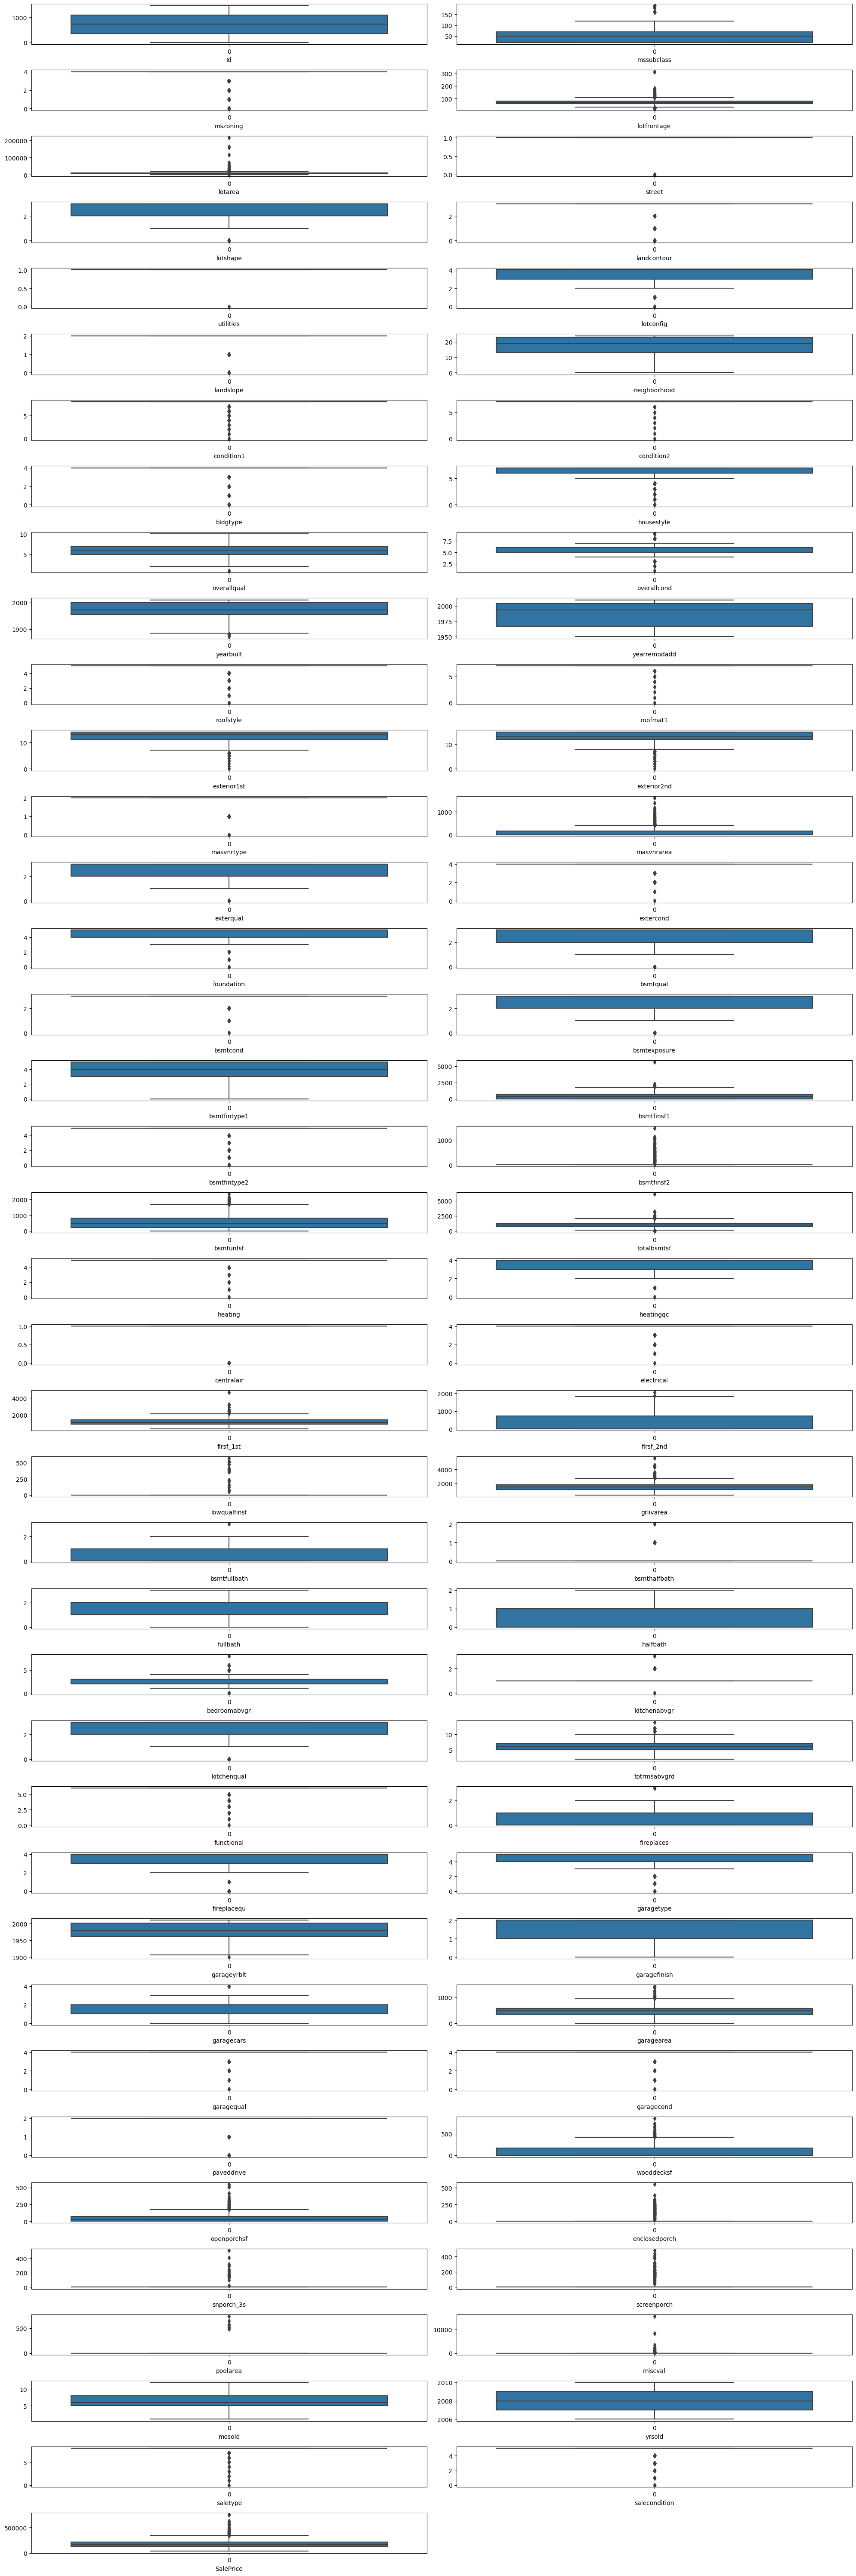

In [172]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=77:
        ax=plt.subplot(39,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    
    
    plotnumber+=1
plt.tight_layout()

- Tree-based models like Decision tree, Random forest and Gradient Boosting are outliers Robust i.e models are less affected by outliers
- so we will not handle the outliers
- Rule based algorithm not requiring scaling: Algorithm like Desicion tress and other tree-based methods such as Random Forest 
- and Gradient boosted Decision tree  indeed do not require feature scaling. They make desicion based on order of data, not the specific 
- values,and hence are invariant to scaling


## HeatMap

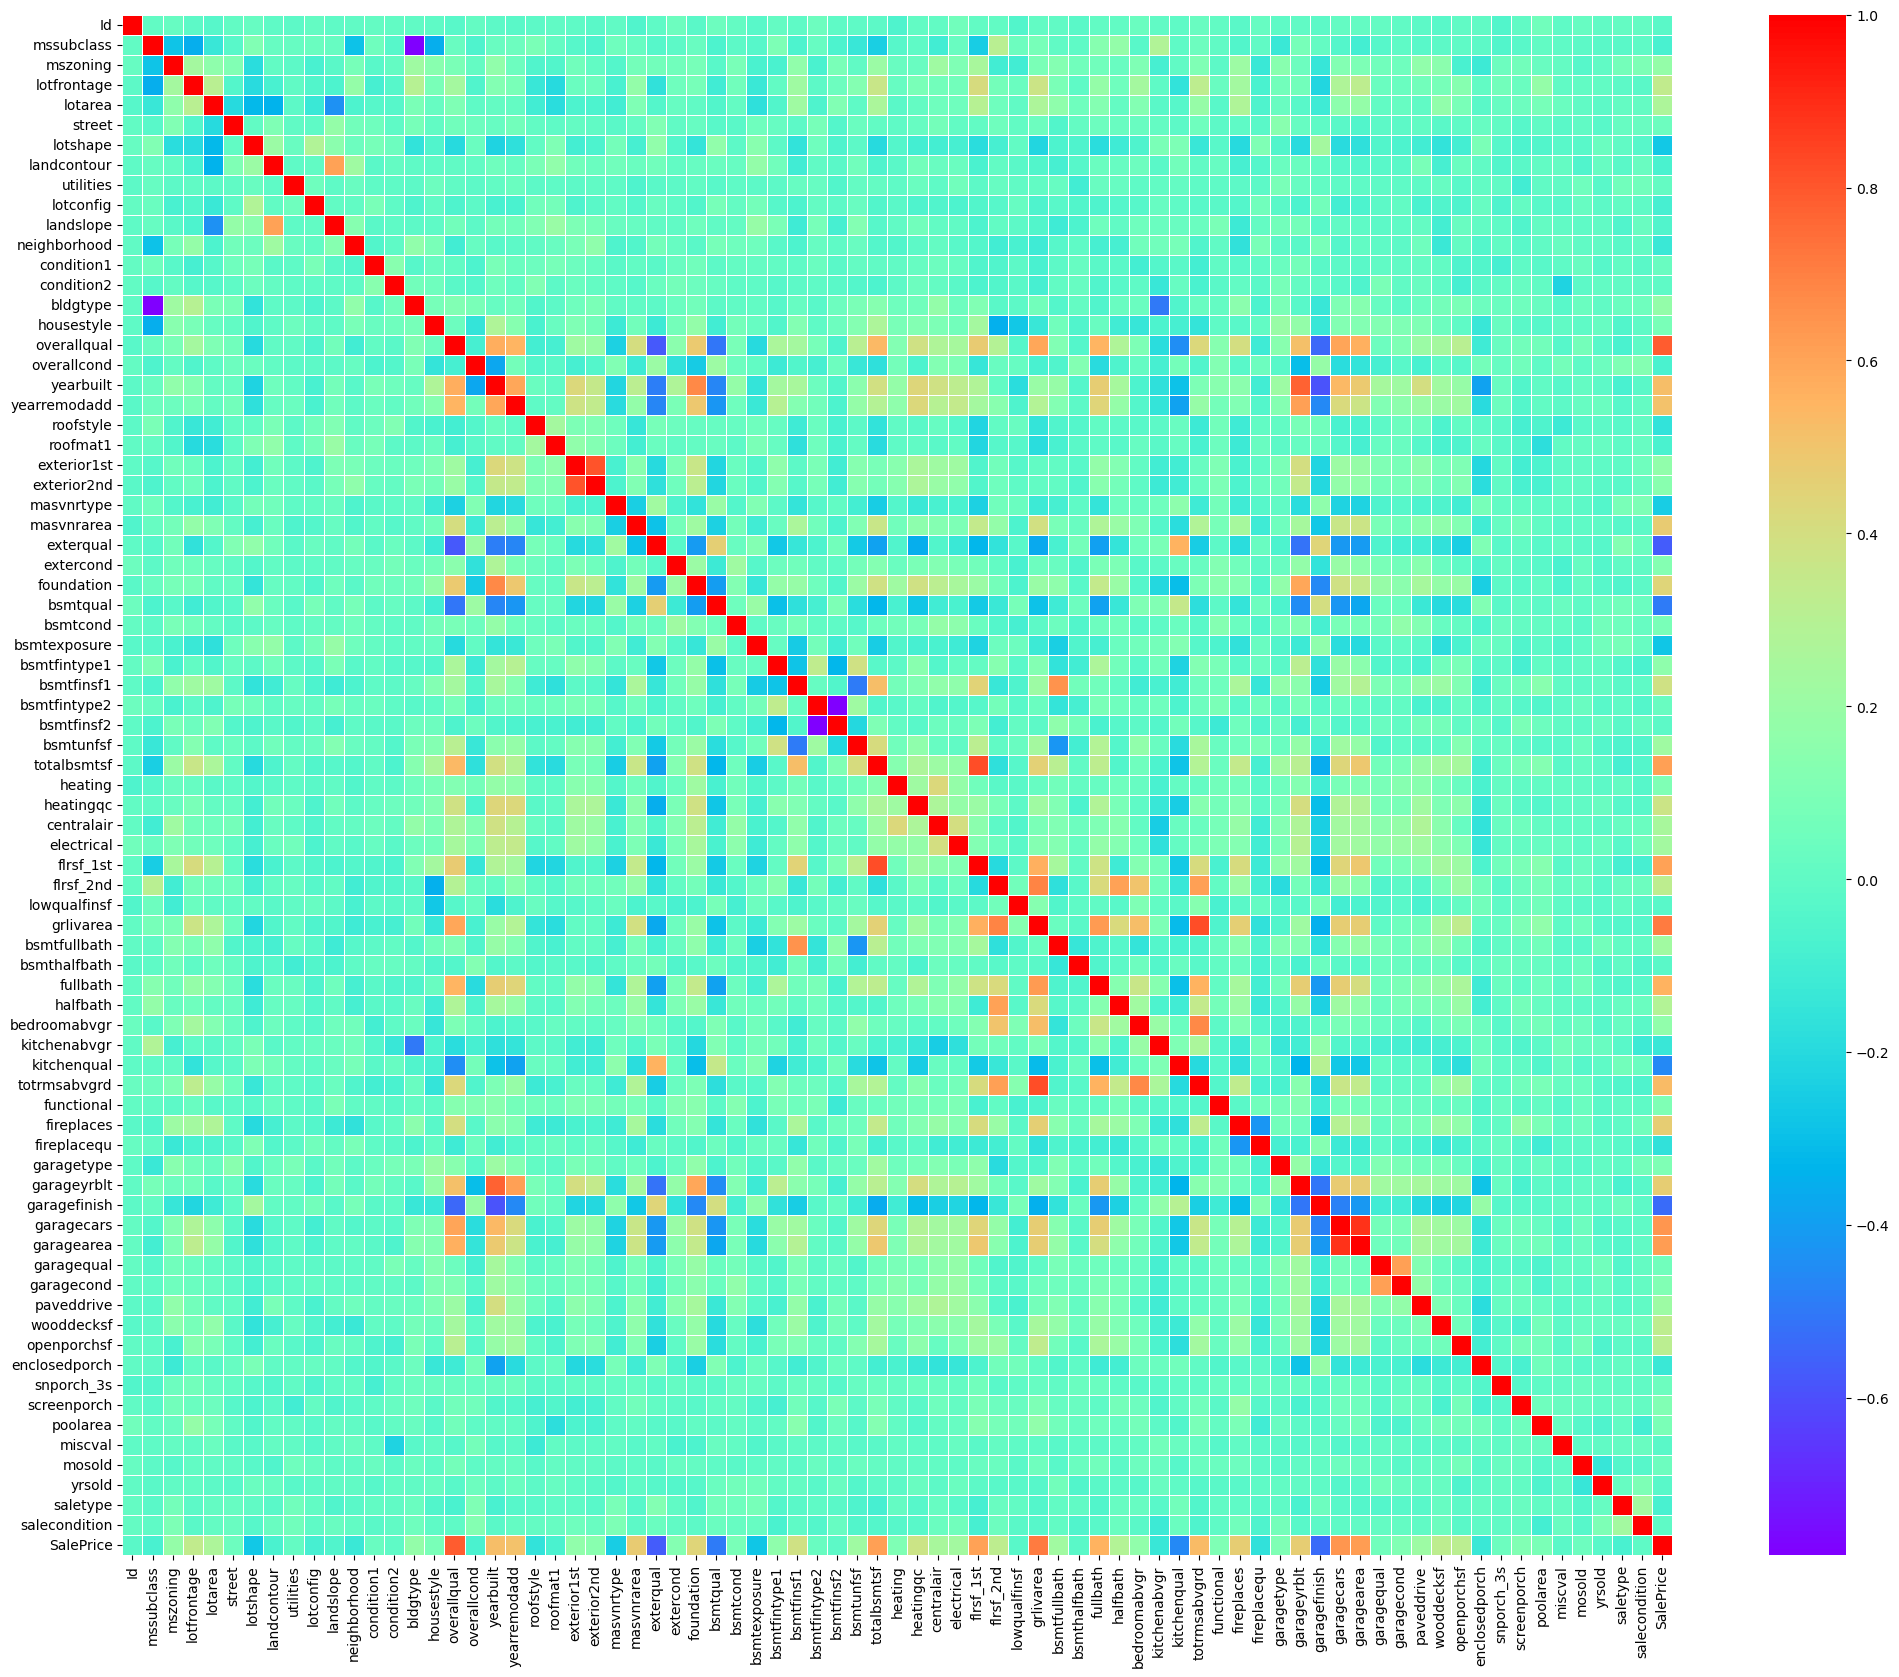

In [171]:
#Plot heatmap to detect correlations among numerical variables
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(data.corr(),cmap='rainbow',linewidths=.5)  
plt.show()

- we will drop that independant variables columns which are highly correlated to each other
- here GarageArea and GarageCars are giving the same information about total area used for garage, so will drop Garage cars column.
- totalbsmttsf ( total basement area in sqr.ft) is highly correlated to flrsf_1st (first flr area in sqr.ft), so we will drop totalbsmttsf as it is
- less important as compared to flrsf_1st.
- grlivarea(above ground living area) is less important than totalrmsabvgrd( total rooms above grade(not include bathroom)) so we will drop grlivarea
- garageyrsblt and yrblt are giving same info about year of built, so we will drop garageyrsblt

In [9]:
data.drop([['totalbsmtsf','grlivarea','garageyrblt','garagecars']],axis=1,inplace=True)

### Create X and y

In [419]:
X = data.drop('SalePrice', axis=1)#independent variable
y= data.SalePrice #target variable

In [420]:
X.shape

(1460, 72)

In [421]:
y.shape

(1460,)

## Train-Test Split

In [422]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [423]:
X_train.shape

(1095, 72)

In [424]:
X_test.shape

(365, 72)

In [425]:
y_train.shape

(1095,)

In [426]:
y_test.shape

(365,)

# Model Creation

## Model 1- Decision Tree

In [430]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(X_train,y_train)#training the model

DecisionTreeRegressor()

In [431]:
y_hat=dt.predict(X_test)#prediction with x_test
y_hat

array([140000., 410000.,  87000., 128000., 313000.,  81000., 192000.,
       155000.,  81000., 139500., 200100., 130000.,  94750., 171000.,
       178000., 132000., 176000., 140000.,  99500., 214000., 190000.,
       212000., 172400., 124000., 223500., 179000., 164990.,  82000.,
       172400., 250580., 148000., 315750., 190000.,  97000., 250000.,
       160000., 132500., 215000., 248000., 108000., 141000., 237000.,
       110000., 372500., 142500., 214500., 135000., 129500., 582933.,
       137000., 119750., 205000., 161750., 274000., 143000., 214000.,
       203000., 190000., 125000.,  95000., 100000., 157900., 309000.,
       485000., 249700., 152000., 110000., 281000.,  91000., 146500.,
       144000., 135000., 108000., 109900., 335000., 220000., 290000.,
       260000., 140000., 125000., 106000.,  60000., 140000.,  87000.,
       161750., 135000., 252000., 239000., 143000., 176500., 140000.,
       172500., 127000., 250000., 100000., 176432., 129900., 171900.,
       201000., 1950

In [433]:
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

## r2_score for testing data
r2_test=r2_score(y_hat,y_test)
r2_test

0.7427492839226935

### Model 2- RandomForest

In [193]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)  # ravel() flattens the y_train array to 1D

RandomForestRegressor()

In [194]:
# Predicting the test set results
y_hat = random_forest.predict(X_test)
# checking accuracy
r2s = r2_score(y_test,y_hat)
r2s

0.8829043168595999

### Model 3- RandomForest RandomizedSearchCV 

In [204]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_rgrs = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_rgrs, scoring='r2',param_distributions=random_grid, n_iter=80, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters



Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [205]:
best_param_dt=RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None,bootstrap=False)#passing best parameter to decision tree
best_param_dt.fit(X_train,y_train)#traing model with best parameter
y_hat=best_param_dt.predict(X_test)#predicting
y_hat

array([139129.845 , 315475.5525, 112410.06  , 139107.435 , 322429.1325,
        90843.885 , 200672.12  , 147151.545 ,  86354.4575, 130014.635 ,
       144571.98  , 125143.91  , 132600.3075, 202727.015 , 174646.4   ,
       129464.    , 195708.1225, 135107.3   , 119833.295 , 218249.51  ,
       174952.4   , 224589.6775, 188498.7825, 127448.21  , 207517.6025,
       184259.01  , 187856.745 , 111045.625 , 180106.9175, 198159.9225,
       127335.1275, 271631.345 , 206503.025 , 111683.5   , 260230.9825,
       150637.9375, 139179.5625, 206093.1975, 302957.935 , 112542.975 ,
       126546.25  , 221950.5625, 119890.0725, 371450.92  , 132131.89  ,
       137280.8875, 115116.8575, 126583.145 , 402887.575 , 137697.0925,
       121145.9375, 205376.69  , 131817.865 , 304226.075 , 144926.5125,
       241965.59  , 199089.2875, 166454.715 , 148791.8125, 118222.6225,
        81376.875 , 144655.7275, 293170.02  , 276445.97  , 285629.4325,
       196488.6375, 110894.925 , 315794.815 , 129491.415 , 16399

In [206]:
y_hat = best_param_dt.predict(X_test)
# checking accuracy
r2s = r2_score(y_test,y_hat)
r2s

0.8897359317295843

### Model 4- XtreamGradientBoosting

In [434]:
## model creation
from xgboost import XGBRegressor #importing the model library
xgb_r=XGBRegressor()
## object creation

xgb_r.fit(X_train,y_train) # fitting the data

y_hat=xgb_r.predict(X_test) #predicting the price

In [435]:
y_hat

array([143451.58 , 303997.44 , 112119.28 , 151760.9  , 317041.62 ,
        82957.68 , 235467.47 , 154149.64 ,  87944.984, 140110.84 ,
       166336.89 , 128368.55 , 130462.984, 201845.58 , 167969.9  ,
       131105.1  , 202804.61 , 134312.67 , 107620.   , 226442.6  ,
       174406.78 , 241751.11 , 177716.05 , 135535.92 , 211383.31 ,
       167260.47 , 183256.48 , 103680.72 , 170910.69 , 193858.52 ,
       128532.67 , 283264.78 , 185315.8  , 100226.484, 264907.7  ,
       141765.4  , 128661.83 , 211172.97 , 304044.66 , 114404.67 ,
       124401.53 , 241990.05 , 119683.73 , 339070.8  , 122252.414,
       160386.78 , 118525.51 , 126541.64 , 273646.72 , 145500.73 ,
       124967.445, 195277.55 , 140959.75 , 381678.1  , 146229.42 ,
       235233.66 , 198213.89 , 165213.81 , 150840.88 , 102921.8  ,
        68401.94 , 153246.06 , 307866.28 , 305784.75 , 267476.5  ,
       221874.14 , 115387.734, 419100.72 , 114970.54 , 168249.17 ,
       121513.67 , 127599.35 , 121107.31 ,  90810.08 , 494101.

In [438]:
test_score=r2_score(y_test, y_hat)
test_score

0.8849198151840229

## Model 5- XGB RandomisedSearchCV

In [442]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,21,25.6,27,30,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100],
              'alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb_r=XGBRegressor(random_state=42,verbosity=0,silent=0)
xgb_r_cv= RandomizedSearchCV(estimator=xgb_r, scoring='r2', param_distributions = param_grid, n_iter=100, cv=3, 
                               verbose=1, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
xgb_r_cv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = xgb_r_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.1, 'lambda': 0.8, 'gamma': 27, 'alpha': 0})


In [443]:
best_param_dt=XGBRegressor(n_estimators=80, max_depth=5, learning_rate=0.1, reg_lambda=0.8, gamma=27, alpha=0)#passing best parameter to decision tree
best_param_dt.fit(X_train,y_train)#traing model with best parameter
y_hat=best_param_dt.predict(X_test)#predicting
y_hat

array([142262.69 , 307829.94 , 113511.7  , 150847.97 , 329597.97 ,
        82565.47 , 224252.61 , 141849.83 ,  88883.66 , 130464.   ,
       161091.23 , 131665.02 , 122186.85 , 204067.62 , 173664.44 ,
       129805.84 , 201475.42 , 134133.9  , 113813.445, 217718.86 ,
       159623.72 , 250496.6  , 171058.86 , 131359.5  , 205002.88 ,
       167256.53 , 193023.75 , 108382.89 , 176274.22 , 180282.33 ,
       122778.56 , 284693.8  , 195132.78 , 108459.484, 248098.78 ,
       150171.64 , 129854.53 , 206475.3  , 307531.7  , 108750.25 ,
       124289.35 , 228057.47 , 117924.2  , 340298.66 , 126397.8  ,
       142973.33 , 108917.984, 127786.3  , 391241.28 , 130334.66 ,
       120122.85 , 193639.08 , 120054.97 , 378375.84 , 145417.64 ,
       236116.98 , 195710.16 , 157110.34 , 143073.44 , 107478.15 ,
        72203.77 , 154990.62 , 293547.97 , 317997.84 , 274815.28 ,
       208096.94 , 111430.69 , 357592.1  , 118503.32 , 162669.66 ,
       116781.734, 129986.77 , 115404.836,  94836.58 , 461770.

In [444]:
test_score=r2_score(y_test, y_hat)
test_score

0.9076376641283587

## Model Comparison

In [10]:
df = pd.DataFrame()
df['Model'] = ['Decision tree', 'Random Forest', 'RandomForest RandomizedSearchCV','XGB','XGB RandomizedSearchCV']
df['r2_score'] = [0.76, 0.88, 0.89, 0.88, 0.91]
df

,Model,r2_score
0,Decision tree,0.76
1,Random Forest,0.88
2,RandomForest RandomizedSearchCV,0.89
3,XGB,0.88
4,XGB RandomizedSearchCV,0.91


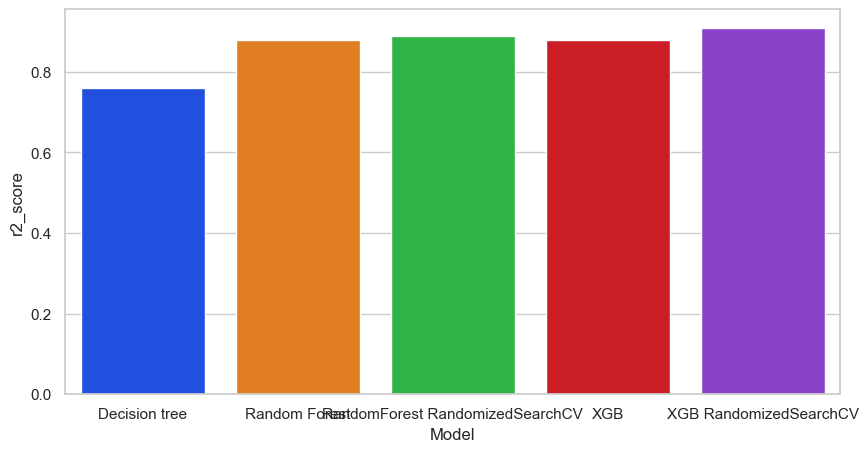

In [11]:
# coparision using graph
plt.figure(figsize=(10,5))
sns.set(style= 'whitegrid')
ax=sns.barplot(x='Model',y='r2_score',data=df,palette='bright')

# **Conclusion**-  
Xtream Gradiant Boosting with hyperparameter tunning using randomizes search Cross-Validation is best fit model for this dataset.It                     is giving good accuracy and generalized model.

### Report on challenges faced:
* Data preprocessing: Dataset is large, so preprocessing is lengthy.
* Feature Selection: Choosing the right set of features that are relevant to the problem at hand can significantly impact the accuracy of a model.
* Solutions to problems we encountered while working on this project.

- Suggestion to bank marketing team:
- Clearly define what the bank aims to achieve with the house price prediction model.
- Collect high-quality, comprehensive data.This includes historical house prices, property features (e.g., size, number of bedrooms, location), economic indicators, and market trends.
- Identify and create features that significantly impact house prices, such as location-specific factors (neighborhood amenities, crime rates), property-specific features (age, type, size), and market conditions (interest rates, inflation).
- Advanced Techniques: Use advanced feature engineering techniques, such as creating interaction terms or using domain knowledge to create meaningful variables.
- Choose appropriate models for house price prediction.
- Use cross-validation techniques to ensure the model’s robustness and avoid overfitting.
- Use relevant evaluation metrics to assess the model’s performance. Metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score are commonly used for regression tasks.
- Compare the model's performance against benchmarks or existing methods to validate improvements.
- Make usefull insights.



### 